In [1]:
!pip install pandas

In [5]:
import csv, sqlite3

con = sqlite3.connect("boston.db")
cur = con.cursor()

In [6]:
%reload_ext sql

In [7]:
%sql sqlite:///boston.db

## Task 3: Load in the Dataset in your Jupyter Notebook

In [12]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [44]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

In [14]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [15]:
%matplotlib inline

### 1. For the "Median value of owner-occupied homes" provide a boxplot

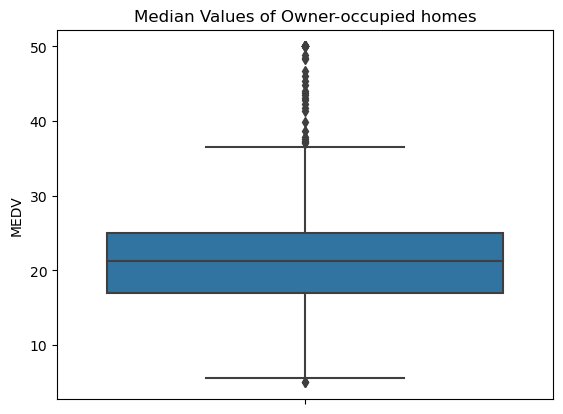

In [16]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median Values of Owner-occupied homes");

### 2. Provide a bar plot for the Charles river variable

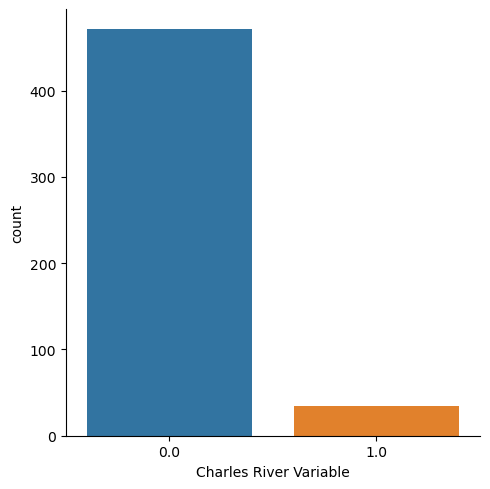

In [17]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River Variable");

### 3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [19]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'Between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

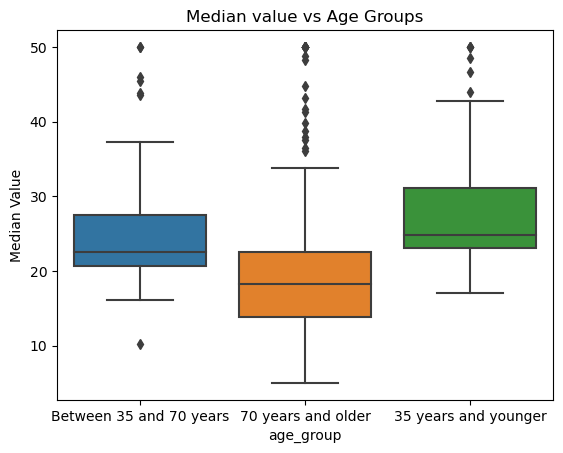

In [20]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value");

The boxplot above shows that on average the median value of owner occupied homes is higher when the Age is lower

### 3. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

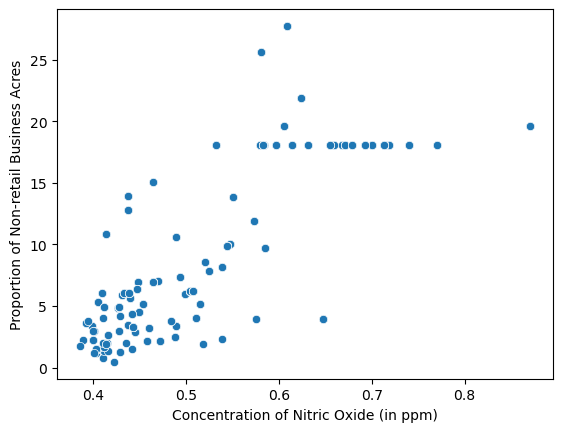

In [21]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");

From the above scatter plot, it's reflect that there is a positive sloping relationship between concentration of Nitric Oxides and the proportion of non-retail business acres per town. Generally, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

### 4.Create a histogram for the pupil to teacher ratio variable

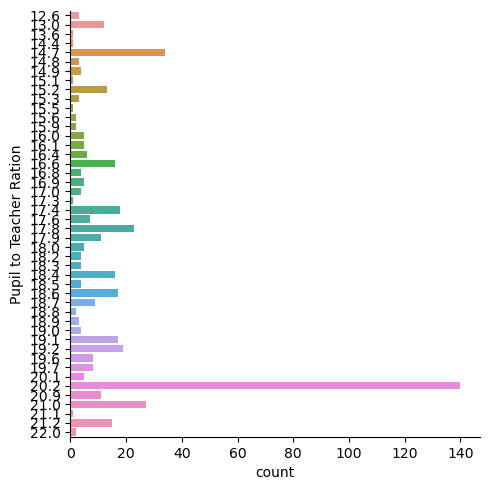

In [22]:
sns.catplot(y="PTRATIO", kind="count", data=boston_df)
plt.ylabel("Pupil to Teacher Ration");

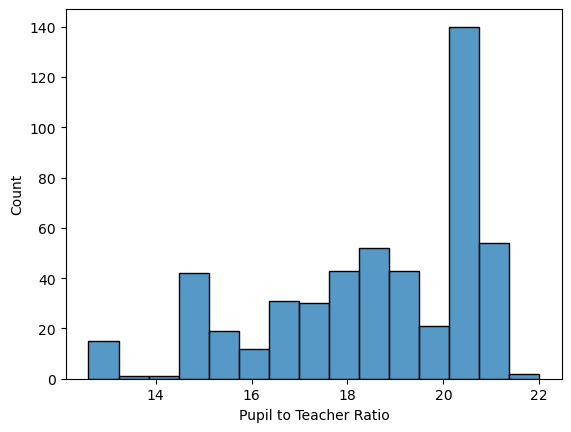

In [25]:
sns.histplot(boston_df.PTRATIO, kde=False, bins=15)
plt.xlabel("Pupil to Teacher Ratio");

## Task 5: Use the appropriate tests to answer the questions provided.

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis

H
0
:
µ
1
=
µ
2
 ("there is no difference in between the median value of houses bounded by Charles river and not bounded.")

H
a
:
µ
1
≠
µ
2
 ("there is a difference in between the median value of houses bounded by Charles river and not bounded.")

Set α to 0.05

In [28]:
!pip install scipy

In [31]:
import scipy
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [37]:
import scipy as sci

In [38]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

#### The Answer:
Since the p-value is less than 0.05, we will reject the null hypothesis as there is no significance difference in median value of houses bounded by Charles river and not.

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### Hypothesis

H
0
:
µ
1
=
µ
2
 ("There is no difference in median values of houses for occupied units built prior to 1940")

H
a
:
µ
1
≠
µ
2
 ("There is a difference in median values of houses for occupied units built prior to 1940")

Set α to 0.05

In [39]:
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

In [40]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964923, pvalue=0.2083265383143275)

#### The Answer
Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### Hypothesis

H
0
:
µ
1
=
µ
2
 (" There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town")

H
a
:
µ
1
≠
µ
2
 ("There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town")

Set α to 0.05

In [41]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

PearsonRResult(statistic=0.7636514469209149, pvalue=7.913361061240043e-98)

#### The Answer
Since the p-value is greater than 0.05, we can reject the null hypothesis that there is no relationship between the nitric acid concentration and the proportion of non-retail business acres per town.

And as the r value is positive and close to zero, we can conclude that there is a almost strong relationship between these two variables and the relationship curve will be positively sloping.

### 4. •	What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [42]:
import statsmodels.api as sm

In [43]:
X = boston_df['DIS']

y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 11 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        12:15:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The Answer
There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.